In [36]:
import mglearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
from sklearn import tree

In [2]:
# follow_01_data 불러오기

data1 = pd.read_csv("follow_01_data.csv")

In [3]:
# follow_01_data 중 사용할 feature만 걸러내기

data1_1 = data1[['T00_ID', 'T00_SEX', 'T01_AGE', 'T01_DRINK', 'T01_DRDU', 'T01_SMOKE', 'T01_SMDU', 'T01_EXER', 'T01_FMFHT', 'T01_FMMHT',
             'T01_FMFDM', 'T01_FMMDM', 'T01_HEIGHT', 'T01_WEIGHT', 'T01_WAIST', 'T01_HIP', 'T01_PULSE', 'T01_SBP', 'T01_DBP',
              'T01_HBA1C', 'T01_GLU0', 'T01_CREATININE', 'T01_AST', 'T01_ALT', 'T01_TCHL', 'T01_HDL', 'T01_TG', 'T01_INS0', 'T01_HTN']]

In [4]:
# follow_02_data 불러오기

data2 = pd.read_csv("follow_02_data.csv")

In [5]:
# follow_02_data 중 사용할 feature만 걸러내기

data2_1 = data2[['T00_ID', 'T02_HTN']]

In [6]:
# ID를 기준으로 두 데이터 자료 합치기

df = pd.merge(data1_1, data2_1)

In [7]:
df.to_csv('test000.csv')

In [8]:
# T01HTN = T02HTN = 2인 행 제거 (기존에도 고혈압이었는데 추적조사에도 고혈압인 대상)
df1 = df.drop(index= df[(df['T01_HTN']==2) & (df['T02_HTN']==2)].index)

In [9]:
df1.to_csv('test111.csv')

In [10]:
# T01HTN = 2 T02HTN = 1인 행 제거 (기존에는 고혈압이었는데 추적조사에는 정상으로 대상)
df2 = df1.drop(index= df1[(df1['T01_HTN']==2) & (df1['T02_HTN']==1)].index)

In [11]:
df2.to_csv('test222.csv')

In [12]:
# T01HTN 열 제거
df3 = df2.drop('T01_HTN', axis='columns')

# 해당없음 77777을 0으로 convert
replace_column=['T00_ID', 'T00_SEX', 'T01_AGE', 'T01_DRINK', 'T01_DRDU', 'T01_SMOKE', 'T01_SMDU', 'T01_EXER', 'T01_FMFHT', 'T01_FMMHT',
             'T01_FMFDM', 'T01_FMMDM', 'T01_HEIGHT', 'T01_WEIGHT', 'T01_WAIST', 'T01_HIP', 'T01_PULSE', 'T01_SBP', 'T01_DBP',
              'T01_HBA1C', 'T01_GLU0', 'T01_CREATININE', 'T01_AST', 'T01_ALT', 'T01_TCHL', 'T01_HDL', 'T01_TG', 'T01_INS0', 'T02_HTN']

for col in replace_column:
    df3[col].replace(77777.0,0,inplace=True)
    
# Yes or no가 1 또는 2를 0 또는 1로 convert
categorical=['T00_SEX','T01_EXER','T01_FMFHT','T01_FMMHT','T01_FMFDM','T01_FMMDM', 'T02_HTN']
df3[categorical]=df3[categorical].replace({1.0:0,1:0,2.0:1,2:1})

# 미상, 무응답, 미측정 99999가 포함된 행 제거
mask = df3[['T00_ID', 'T00_SEX', 'T01_AGE', 'T01_DRINK', 'T01_DRDU', 'T01_SMOKE', 'T01_SMDU', 'T01_EXER', 'T01_FMFHT', 'T01_FMMHT',
             'T01_FMFDM', 'T01_FMMDM', 'T01_HEIGHT', 'T01_WEIGHT', 'T01_WAIST', 'T01_HIP', 'T01_PULSE', 'T01_SBP', 'T01_DBP',
              'T01_HBA1C', 'T01_GLU0', 'T01_CREATININE', 'T01_AST', 'T01_ALT', 'T01_TCHL', 'T01_HDL', 'T01_TG', 'T01_INS0', 'T02_HTN']].isin([99999.0])

df4 = df3[~mask]

df5 = df4.dropna()

# 조사안함 66666가 포함된 값은 평균값으로 대체 'T01_PULSE', 'T01_HBA1C', 'T01_INS0'
df6 = df5.replace(66666.0, np.NAN)

df6.loc[df6['T01_PULSE'] != df6['T01_PULSE'], 'T01_PULSE'] = df6['T01_PULSE'].mean()
df6.loc[df6['T01_HBA1C'] != df6['T01_HBA1C'], 'T01_HBA1C'] = df6['T01_HBA1C'].mean()
df6.loc[df6['T01_INS0'] != df6['T01_INS0'], 'T01_INS0'] = df6['T01_INS0'].mean()

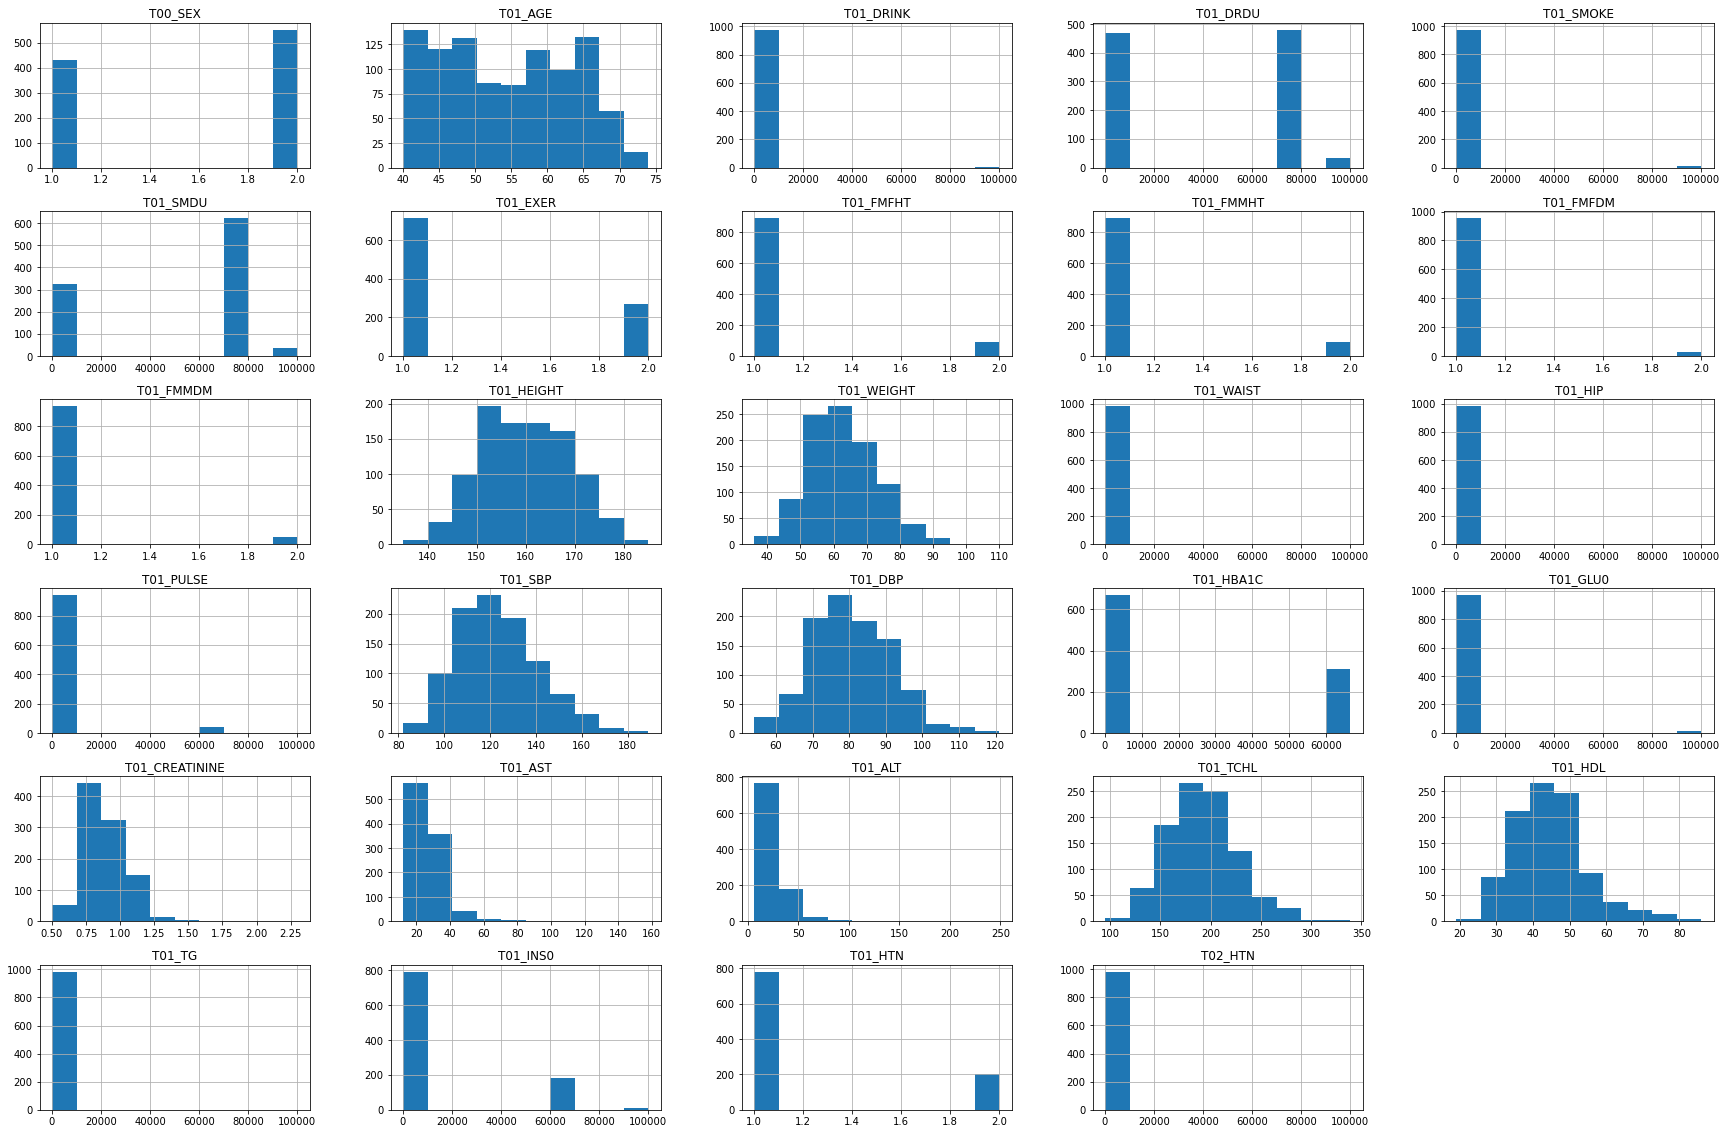

In [13]:
h1 = df.iloc[1:,:].hist(figsize=(30,20))

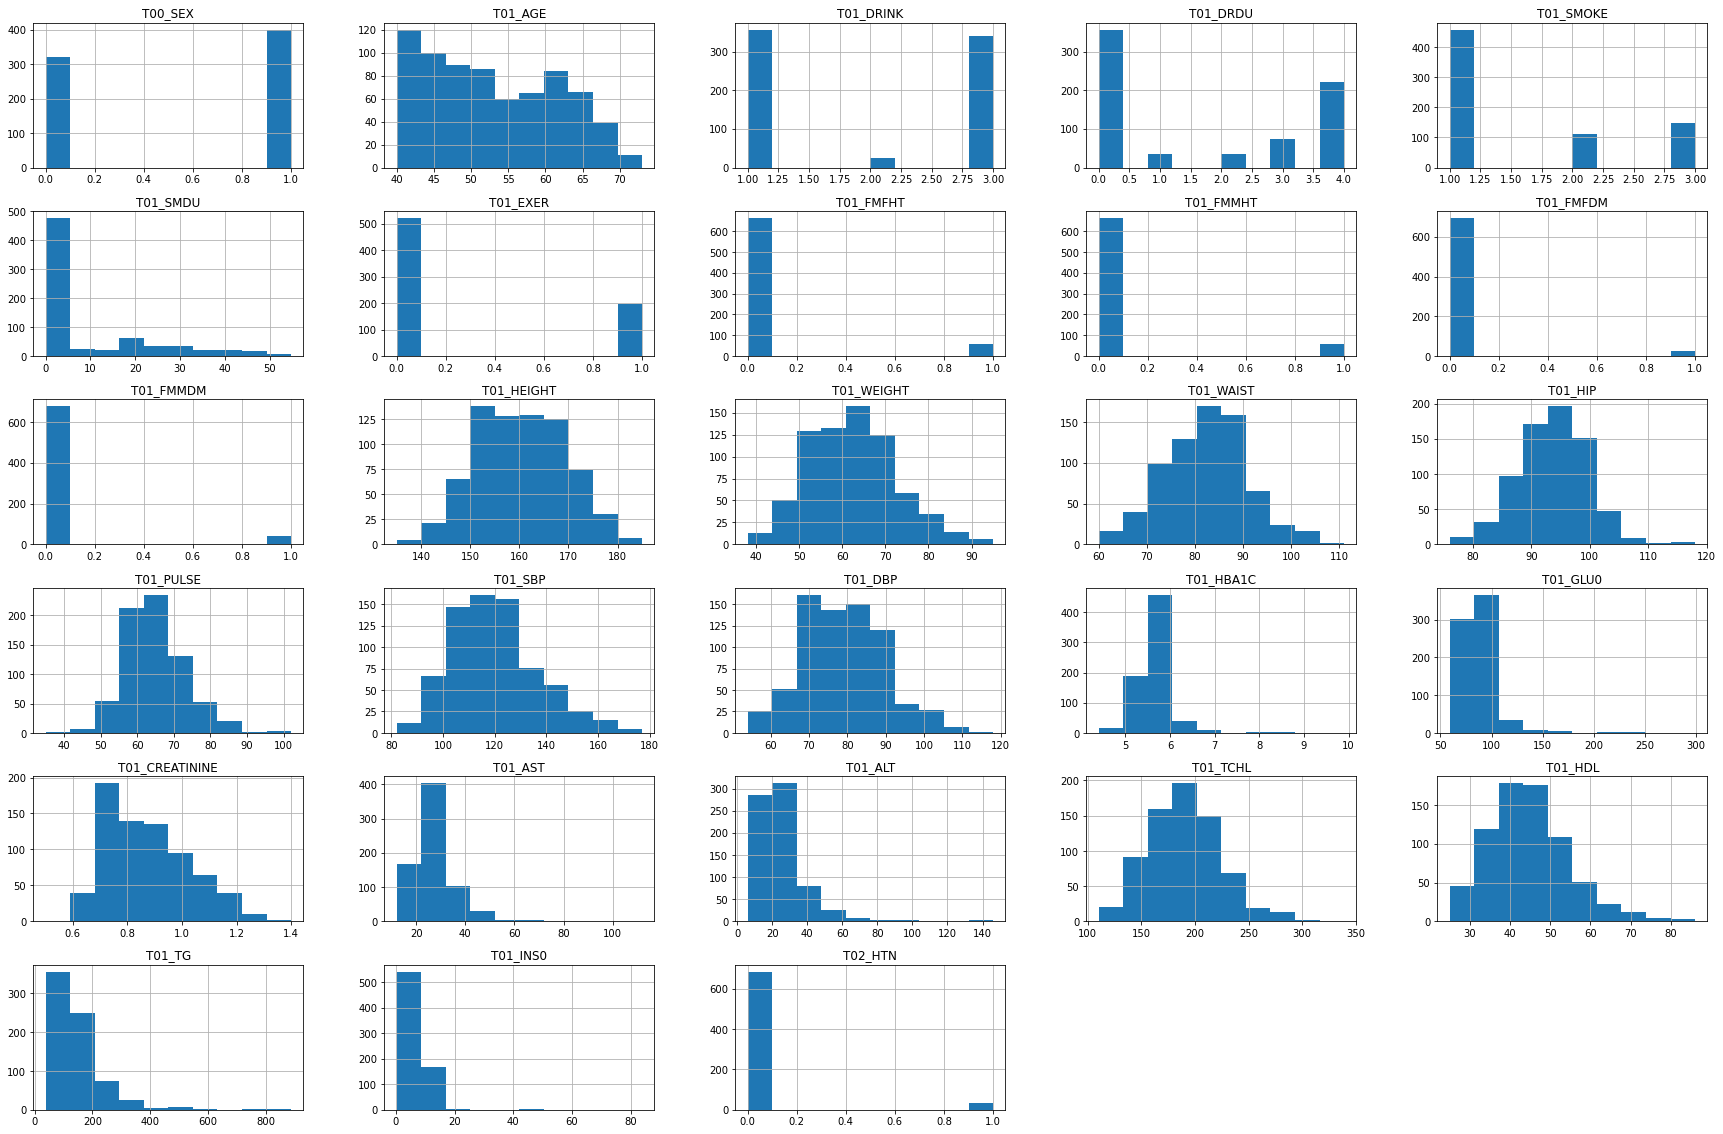

In [14]:
h2 = df6.iloc[1:,:].hist(figsize=(30,20))

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df6[['T00_SEX', 'T01_AGE', 'T01_DRINK', 'T01_DRDU', 'T01_SMOKE', 'T01_SMDU', 'T01_EXER', 'T01_FMFHT', 'T01_FMMHT',
             'T01_FMFDM', 'T01_FMMDM', 'T01_HEIGHT', 'T01_WEIGHT', 'T01_WAIST', 'T01_HIP', 'T01_PULSE', 'T01_SBP', 'T01_DBP',
              'T01_HBA1C', 'T01_GLU0', 'T01_CREATININE', 'T01_AST', 'T01_ALT', 'T01_TCHL', 'T01_HDL', 'T01_TG', 'T01_INS0']], df6['T02_HTN'], random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(540, 27) (540,) (181, 27) (181,)


## Oversampling

In [17]:
print("counts of label '1': {}".format(sum(y_train==1)))
print("counts of label '0': {}".format(sum(y_train==0)))

counts of label '1': 27
counts of label '0': 513


In [18]:
print("counts of label '1': {}".format(sum(y_test==1)))
print("counts of label '0': {}".format(sum(y_test==0)))

counts of label '1': 10
counts of label '0': 171


#### 정상인과 고혈압 환자의 class 비율이 불균형하여, 이는 질병 예측에 있어 모델이 대부분 정상인으로 판별할 가능성이 있어 Oversampling을 수행

In [19]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

In [20]:
sm = SMOTE(random_state=42, sampling_strategy=0.5)

In [21]:
X_resampled, y_resampled = sm.fit_resample(X_train,y_train)

In [22]:
print('After OverSampling, the shape of train_X: {}'.format(X_resampled.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_resampled.shape))

After OverSampling, the shape of train_X: (769, 27)
After OverSampling, the shape of train_y: (769,) 



In [23]:
print("After OverSampling, counts of label '1': {}".format(sum(y_resampled==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_resampled==0)))

After OverSampling, counts of label '1': 256
After OverSampling, counts of label '0': 513


In [24]:
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=1)

print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(615, 27) (615,) (154, 27) (154,)


In [25]:
y_train.value_counts()

0.0    410
1.0    205
Name: T02_HTN, dtype: int64

In [26]:
y_val.value_counts()

0.0    103
1.0     51
Name: T02_HTN, dtype: int64

In [27]:
# validation 수행 후 최종 모델을 학습 시킬 때 사용
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

# 고혈압 발생 환자들의 주요 원인(특징) 파악

## Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

training_accuracy = []
validation_accuracy = []
cross_val_accuracy = []

md_settings = [1, 2, 5, 7, 10, 20]
mss_settings = [2, 3, 5, 7, 10, 30]

for md in md_settings:
    for mss in mss_settings:
        # model training with labeled training data
        clf = DecisionTreeClassifier(max_depth= md, min_samples_split =mss, random_state=0)
        clf.fit(X_train, y_train)
        
        # prediction
        y_train_hat = clf.predict(X_train)
        y_val_hat = clf.predict(X_val)

        # evaluation    
        training_accuracy.append(accuracy_score(y_train, y_train_hat))
        validation_accuracy.append(accuracy_score(y_val, y_val_hat))
        
        # K-fold cross_validation (k = 10)
        kf = KFold(n_splits = 10)
        scores = cross_val_score(clf, X_train, y_train, cv = kf)
        cross_val_accuracy.append(scores.mean())

In [29]:
result1 = pd.DataFrame({"max_depth":sorted(md_settings*6), "min_sample_split":mss_settings*6, "training accuracy": training_accuracy, "validation accuracy": validation_accuracy, "cross_val_accuracy":cross_val_accuracy})
result1

,max_depth,min_sample_split,training accuracy,validation accuracy,cross_val_accuracy
0,1,2,0.796748,0.740260,0.796986
1,1,3,0.796748,0.740260,0.796986
2,1,5,0.796748,0.740260,0.796986
3,1,7,0.796748,0.740260,0.796986
4,1,10,0.796748,0.740260,0.796986
5,1,30,0.796748,0.740260,0.796986
6,2,2,0.863415,0.805195,0.853940
7,2,3,0.863415,0.805195,0.853940
8,2,5,0.863415,0.805195,0.853940
9,2,7,0.863415,0.805195,0.853940


In [30]:
result1.loc[result1['cross_val_accuracy'].idxmax()]

max_depth              10.000000
min_sample_split        5.000000
training accuracy       0.991870
validation accuracy     0.902597
cross_val_accuracy      0.910603
Name: 26, dtype: float64

In [31]:
# model test
clf = DecisionTreeClassifier(max_depth = 10, min_samples_split = 5, random_state=0)
clf.fit(X_train_val, y_train_val)

# prediction
y_test_hat = clf.predict(X_test)

# evaluation
test_accuracy = accuracy_score(y_test, y_test_hat)

print("Accuracy on test set: ", test_accuracy)

Accuracy on test set:  0.9060773480662984


              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95       171
         1.0       0.29      0.50      0.37        10

    accuracy                           0.91       181
   macro avg       0.63      0.71      0.66       181
weighted avg       0.93      0.91      0.92       181



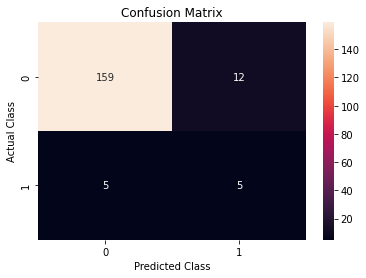

In [32]:
matrix = confusion_matrix(y_test, y_test_hat)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
print(classification_report(y_test, y_test_hat))

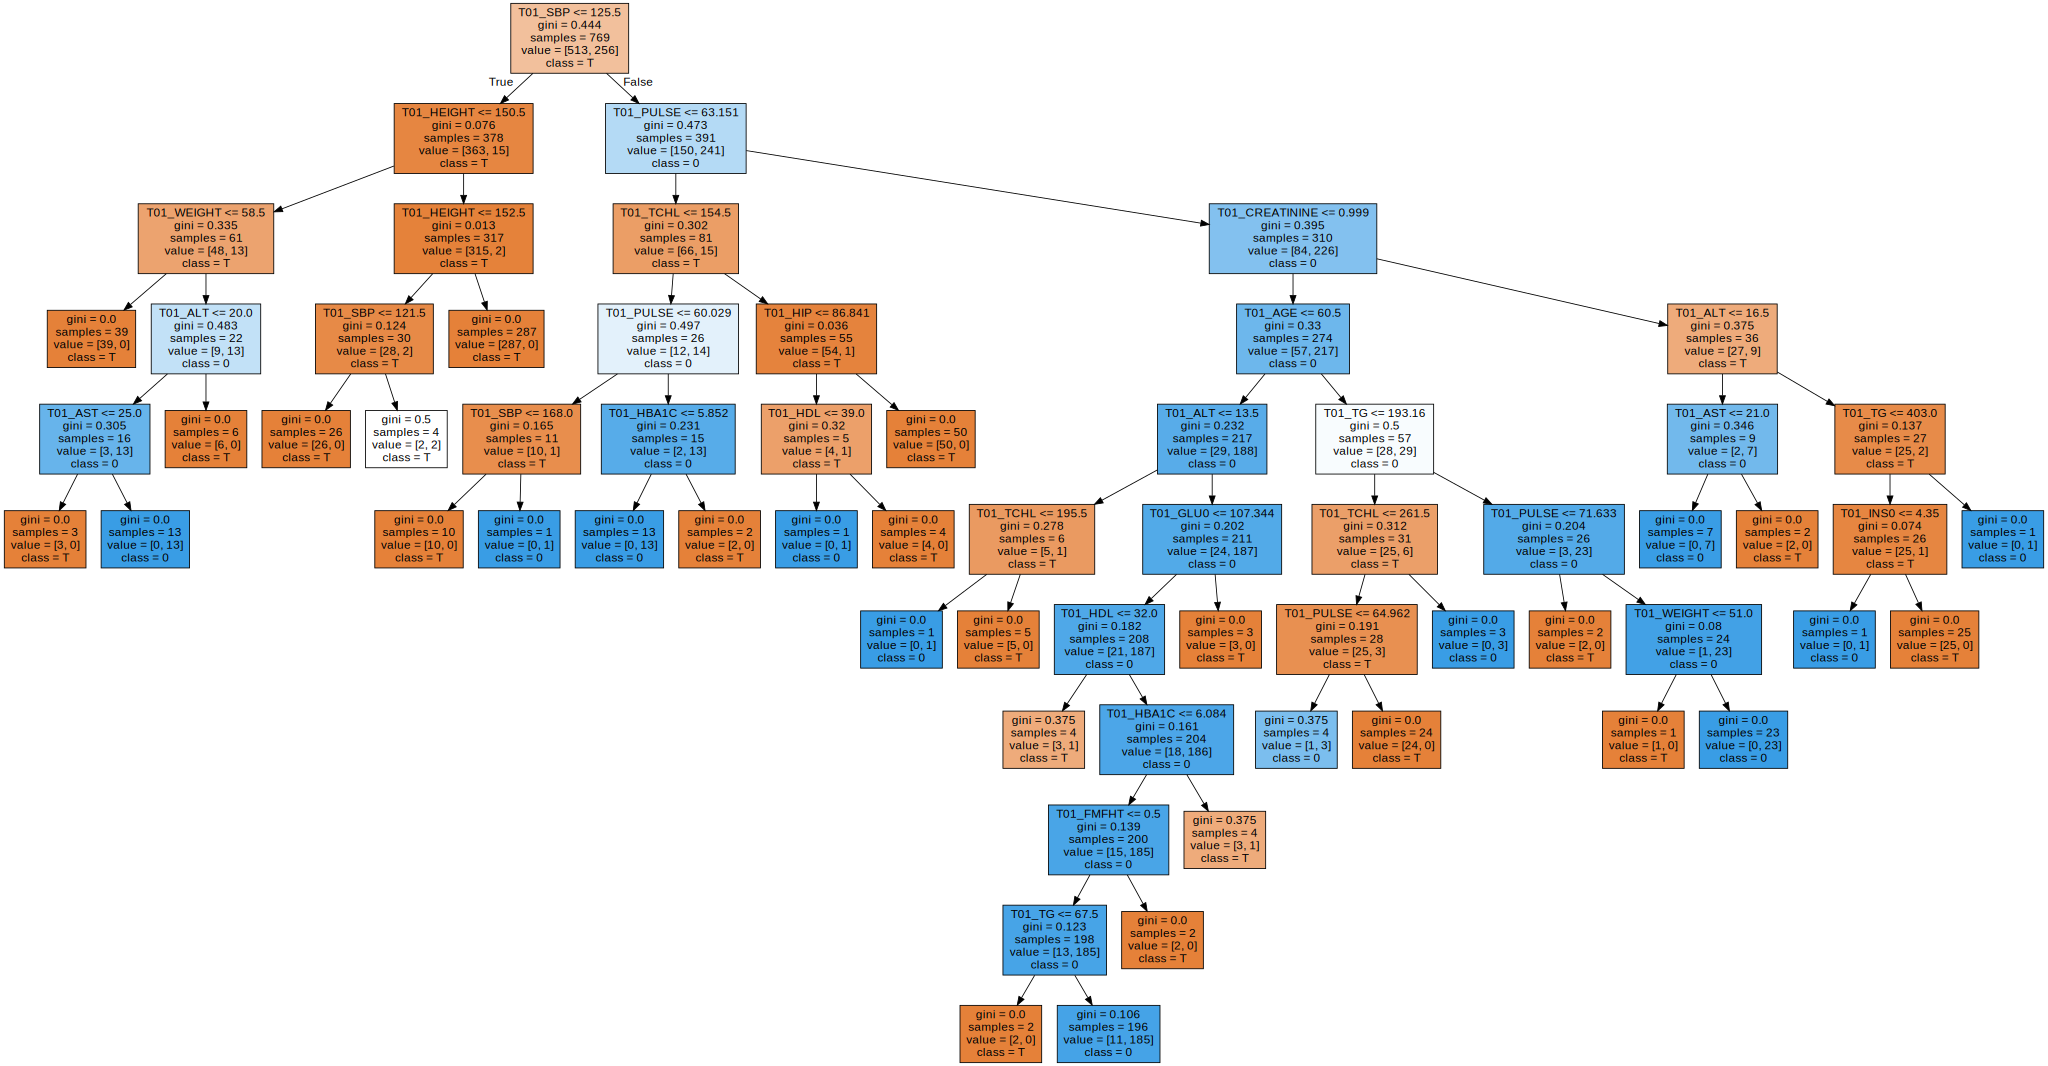

In [37]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=['T00_SEX', 'T01_AGE', 'T01_DRINK', 'T01_DRDU', 'T01_SMOKE', 'T01_SMDU', 'T01_EXER', 'T01_FMFHT', 'T01_FMMHT',
                                               'T01_FMFDM', 'T01_FMMDM', 'T01_HEIGHT', 'T01_WEIGHT', 'T01_WAIST', 'T01_HIP', 'T01_PULSE', 'T01_SBP', 'T01_DBP',
                                               'T01_HBA1C', 'T01_GLU0', 'T01_CREATININE', 'T01_AST', 'T01_ALT', 'T01_TCHL', 'T01_HDL', 'T01_TG', 'T01_INS0'],  
                                class_names= 'T02_HTN',
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

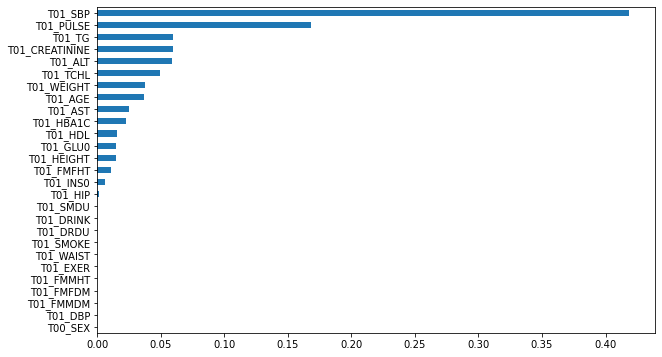

In [38]:
f_i=pd.Series(clf.feature_importances_, index=X_train.columns)
f_i.sort_values(ascending=False)
import matplotlib.pyplot as plt
f_i.sort_values().plot(kind='barh',figsize=(10,6))
plt.show()

## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

training_accuracy= []
validation_accuracy = []
cross_val_accuracy = []

n_settings = [1, 2, 5, 10, 20, 30, 50]
max_depth = [2, 3, 5, 7, 10]

for n in n_settings:
    for depth in max_depth:
        rf = RandomForestClassifier(n_estimators=n, max_depth = depth, random_state=0)
        rf.fit(X_train, y_train)
    
        # prediction
        y_train_hat = rf.predict(X_train)
        y_val_hat = rf.predict(X_val)
    
        # evluation
        training_accuracy.append(accuracy_score(y_train, y_train_hat))
        validation_accuracy.append(accuracy_score(y_val, y_val_hat))
        
        # K-fold cross_validation (k = 10)
        kf = KFold(n_splits = 10)
        scores = cross_val_score(rf, X_train, y_train, cv = kf)
        cross_val_accuracy.append(scores.mean())

In [40]:
result2 = pd.DataFrame({'n_estimators':n_settings * 5, 'max_depth':max_depth * 7, 'training accuracy': training_accuracy, 'validation accuracy': validation_accuracy, "cross_val_accuracy":cross_val_accuracy})
result2

,n_estimators,max_depth,training accuracy,validation accuracy,cross_val_accuracy
0,1,2,0.796748,0.798701,0.764437
1,2,3,0.808130,0.785714,0.772501
2,5,5,0.853659,0.798701,0.855182
3,10,7,0.921951,0.844156,0.858435
4,20,10,0.954472,0.915584,0.856848
5,30,2,0.793496,0.785714,0.774088
6,50,3,0.869919,0.857143,0.834188
7,1,5,0.912195,0.876623,0.882919
8,2,7,0.962602,0.902597,0.871497
9,5,10,0.957724,0.863636,0.879535


In [41]:
result2.loc[result2['cross_val_accuracy'].idxmax()]

n_estimators           50.000000
max_depth              10.000000
training accuracy       1.000000
validation accuracy     0.948052
cross_val_accuracy      0.970730
Name: 34, dtype: float64

In [42]:
# model test
rf = RandomForestClassifier(n_estimators= 50, max_depth = 10, random_state = 0)
rf.fit(X_train_val, y_train_val)

# prediction
y_test_hat = rf.predict(X_test)

# evaluation
test_accuracy = accuracy_score(y_test, y_test_hat)

print("Accuracy on test set: ", test_accuracy)

Accuracy on test set:  0.9337016574585635


              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       171
         1.0       0.33      0.20      0.25        10

    accuracy                           0.93       181
   macro avg       0.64      0.59      0.61       181
weighted avg       0.92      0.93      0.93       181



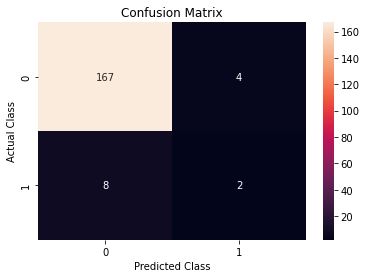

In [43]:
matrix = confusion_matrix(y_test, y_test_hat)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
print(classification_report(y_test, y_test_hat))

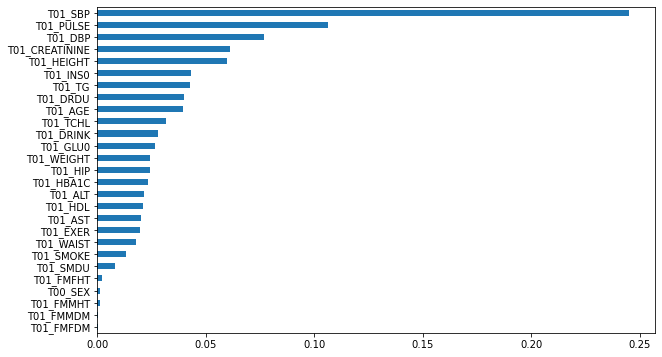

In [44]:
f_i=pd.Series(rf.feature_importances_, index=X_train.columns)
f_i.sort_values(ascending=False)
f_i.sort_values().plot(kind='barh',figsize=(10,6))
plt.show()

# 차후에 고혈압이 발생할 수 있는 사람을 판별

## Suppport Vector Machine

In [45]:
from sklearn.svm import SVC

training_accuracy = []
validation_accuracy = []
cross_val_accuracy = []

C_settings = [0.01, 0.1, 1, 10, 100]      
gamma_settings = [0.01, 0.1, 0.5, 0.7, 1]

for C in C_settings:
    for gamma in gamma_settings:
        svc = SVC(C = C, kernel = 'rbf', gamma = gamma)
        svc.fit(X_train, y_train)

        # prediction
        y_train_hat = svc.predict(X_train)
        y_val_hat = svc.predict(X_val)
    
        # evluation
        training_accuracy.append(accuracy_score(y_train, y_train_hat))
        validation_accuracy.append(accuracy_score(y_val, y_val_hat))
        
        # K-fold cross_validation (k = 10)
        kf = KFold(n_splits = 10)
        scores = cross_val_score(svc, X_train, y_train, cv = kf)
        cross_val_accuracy.append(scores.mean())

In [46]:
result3 = pd.DataFrame({'C':sorted(C_settings*5), 'gamma':gamma_settings*5, 'training accuracy': training_accuracy, 'validation accuracy': validation_accuracy, "cross_val_accuracy":cross_val_accuracy})
result3

,C,gamma,training accuracy,validation accuracy,cross_val_accuracy
0,0.01,0.01,0.666667,0.668831,0.666288
1,0.01,0.10,0.666667,0.668831,0.666288
2,0.01,0.50,0.666667,0.668831,0.666288
3,0.01,0.70,0.666667,0.668831,0.666288
4,0.01,1.00,0.666667,0.668831,0.666288
5,0.10,0.01,0.666667,0.668831,0.666288
6,0.10,0.10,0.666667,0.668831,0.666288
7,0.10,0.50,0.666667,0.668831,0.666288
8,0.10,0.70,0.666667,0.668831,0.666288
9,0.10,1.00,0.666667,0.668831,0.666288


In [47]:
result3.loc[result3['cross_val_accuracy'].idxmax()]

C                      10.000000
gamma                   0.010000
training accuracy       1.000000
validation accuracy     0.896104
cross_val_accuracy      0.905500
Name: 15, dtype: float64

In [48]:
#svc = SVC(C=100)
#svc.fit(X_train, y_train)

In [49]:
# model test
svc = SVC(C = 10, kernel = 'rbf', gamma = 0.01)
svc.fit(X_train_val, y_train_val)

# prediction
y_test_hat = svc.predict(X_test)

# evaluation
test_accuracy = accuracy_score(y_test, y_test_hat)

print("Accuracy on test set: ", test_accuracy)

Accuracy on test set:  0.9447513812154696


              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       171
         1.0       0.00      0.00      0.00        10

    accuracy                           0.94       181
   macro avg       0.47      0.50      0.49       181
weighted avg       0.89      0.94      0.92       181



C:\Users\Lee\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lee\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lee\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


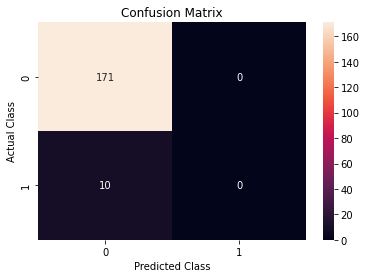

In [50]:
matrix = confusion_matrix(y_test, y_test_hat)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
print(classification_report(y_test, y_test_hat))

## KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier 

In [52]:
score_test = []

n_neighbor = [1, 2, 3, 4, 5]      

for n in n_neighbor:

    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_val, y_train_val)

    y_pred = knn.predict(X_test)
    
    score_test.append(accuracy_score(y_test, y_pred))

In [53]:
pd.DataFrame({"n_neighbors":n_neighbor, "Test set score: {:.2f}": score_test})

,n_neighbors,Test set score: {:.2f}
0,1,0.861878
1,2,0.883978
2,3,0.817680
3,4,0.856354
4,5,0.806630


In [54]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_val, y_train_val)

KNeighborsClassifier(n_neighbors=2)

In [55]:
y_pred = knn.predict(X_test) #=y_pred=y_hat
print("Test set predictions:\n", y_pred)

Test set predictions:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.88


In [ ]:
#Confusion matrix and classification report
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred))